In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# remove unrelated columns
drop_columns = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'loan_status', 'url', 'desc', 
               'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
               'recoveries',  'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
                 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low','policy_code', 
                'application_type', 'disbursement_method', 'debt_settlement_flag',  'debt_settlement_flag_date',
                'settlement_status',  'settlement_date', 'settlement_amount', 'settlement_percentage', 
                'settlement_term', 'sec_app_inq_last_6mths', 'orig_projected_additional_accrued_interest', 
                'payment_plan_start_date','deferral_term', 'total_rec_int', 'zip_code', 'title', 'pymnt_plan',
               'addr_state', 'emp_title']

In [15]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows=1000, low_memory=False).drop(columns=drop_columns)
pd.set_option('display.max_columns', 999)
accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_amount,hardship_start_date,hardship_end_date,hardship_length,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,3600.00,0.0,0.0,30.0,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,24700.00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,home_improvement,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,20000.00,0.0,0.0,NaN,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,debt_consolidation,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,19102.35,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0

In [14]:
list(accepted.columns)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_prncp',
 'total_rec_late_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct'

### Missing Values

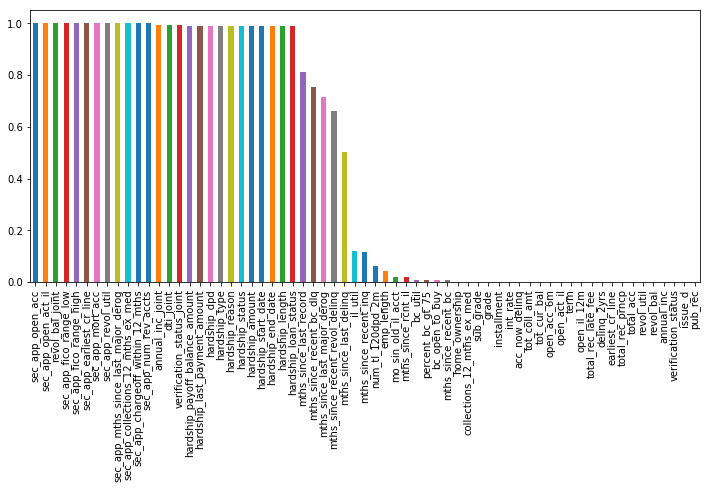

In [4]:
accepted.isna().mean().sort_values(ascending=False).head(65).plot(kind='bar', figsize=(12,5))

Majority of variables related to joint applications are NAN. Therefore, we create a dummy variable for joint application and remove all variables for joint application as most values are NAN.

In [83]:
accepted['isjoint'] = 1*(~accepted['sec_app_fico_range_high'].isna())

In [85]:
sec_columns = accepted.columns[accepted.columns.str.contains('sec_app')]
sec_columns = np.hstack((sec_columns, accepted.columns[accepted.columns.str.contains('_joint')]))
accepted.drop(columns = sec_columns, inplace=True)
sec_columns

array([], dtype=object)

Similarly for hardship variables. Most applicant didn't have hardship status. We create a dummy to refelct whether a person had hardship before or not and remove the hardship related columns

In [86]:
accepted['ishardship'] = 1*(~accepted['hardship_end_date'].isna())

In [87]:
hard_columns = accepted.columns[accepted.columns.str.contains('hardship_')]
accepted.drop(columns = hard_columns, inplace=True)
hard_columns

Index(['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')

For the remaining variables, we replace NaN values with zero

In [88]:
accepted = accepted.fillna(0)

### Data Type

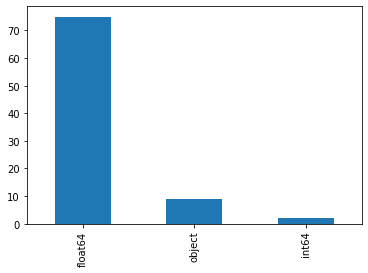

In [89]:
accepted.dtypes.value_counts().plot(kind='bar');

In [111]:
accepted.select_dtypes('object')

,term,grade,sub_grade,home_ownership,verification_status,purpose
0,36 months,C,C4,MORTGAGE,Not Verified,debt_consolidation
1,36 months,C,C1,MORTGAGE,Not Verified,small_business
2,60 months,B,B4,MORTGAGE,Not Verified,home_improvement
3,60 months,C,C5,MORTGAGE,Source Verified,debt_consolidation
4,60 months,F,F1,MORTGAGE,Source Verified,major_purchase
...,...,...,...,...,...,...
995,36 months,B,B5,OWN,Verified,debt_consolidation
996,36 months,B,B2,MORTGAGE,Source Verified,credit_card
997,36 months,A,A3,MORTGAGE,Not Verified,credit_card
998,36 months,C,C1,RENT,Source Verified,debt_consolidation


### Data Cleaning

Convert employement length from string to numeric by extracting numbers

In [104]:
accepted['emp_length'] = accepted['emp_length'].str.extract('(\d+)')[0].fillna(0).astype(int)

Extract the year from earliest_cr_line

In [106]:
accepted['earliest_cr_line'] = accepted['earliest_cr_line'].str.extract('(\d+)')[0].fillna(2018).astype(int)

Extract the year from issue_d

In [110]:
accepted['issue_d'] = accepted['issue_d'].str.extract('(\d+)')[0].fillna(2018).astype(int)

### EDA

Correlation between target and numeric columns

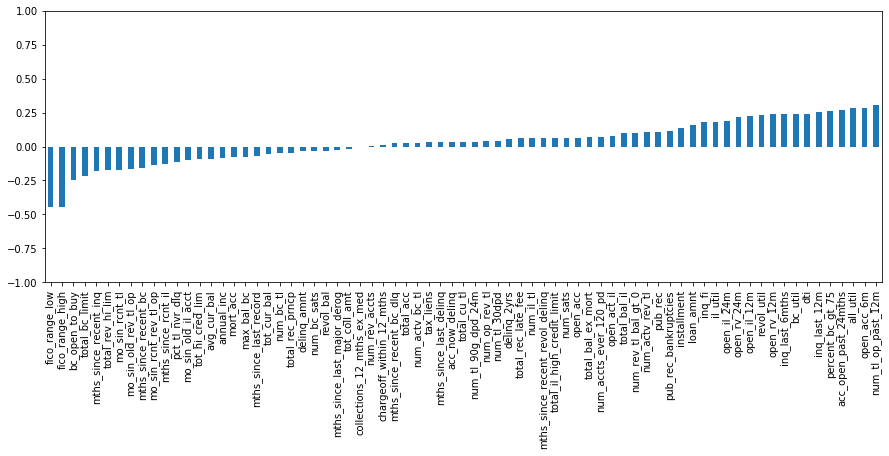

In [60]:
accepted.drop(columns=['int_rate']).corrwith(accepted['int_rate']).\
            sort_values().dropna().plot(kind='bar', figsize=(15,5))
plt.ylim([-1, 1]);

Among features, Fico scores and the number of accounts opened in past 12 months have the highest correlation with the target. Fico score has negative correlation which means that higher Fico score leads to lower interest rate. On the other hand, number of account has positive correlation which means that if a person has opened many account during the last 12 months, his interest rate would be higher

In [55]:
accepted['issue_d'].value_counts()

Dec-2015    1000
Name: issue_d, dtype: int64

This figure shows that longer loan duration leads to highe insterest rate

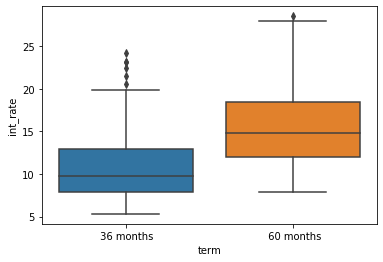

In [16]:
sns.boxplot(x='term', y='int_rate', data=accepted);

Lending club uses a model to assing borrower a grade based on their profile. Grade A has the lowest risk for the investor and grade G has the highest. Below figure shows that the interest rate is highly correlated with borower grade

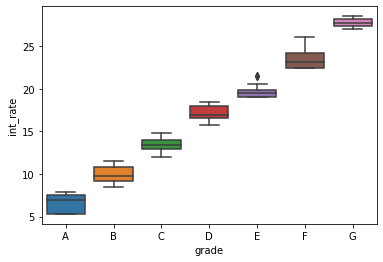

In [18]:
sns.boxplot(x='grade', y='int_rate', data=accepted.sort_values('grade'));

This figure shows the correlation between loan amount and interest rate. Higher loan amounts tend to have higher interest rate

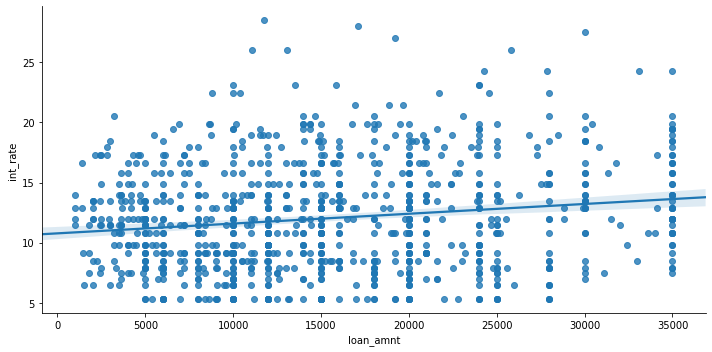

In [33]:
sns.lmplot(x='loan_amnt', y='int_rate', data=accepted,height=5, aspect=2)

FICO score is impacting interest rate for the borower. Better FICO score (higher values) leads to lower interest rate

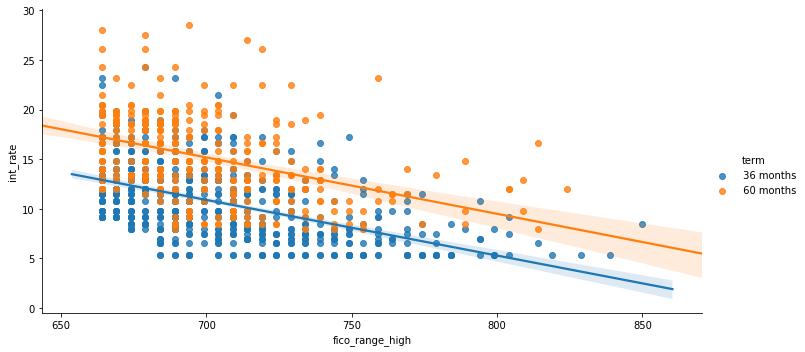

In [37]:
sns.lmplot(x='fico_range_high', y='int_rate', hue='term', data=accepted,height=5, aspect=2)

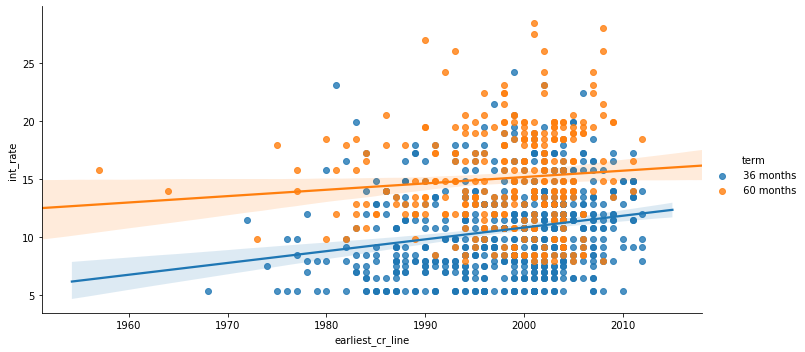

In [117]:
sns.lmplot(x='earliest_cr_line', y='int_rate', hue='term', data=accepted,height=5, aspect=2)

In [132]:
accepted = accepted.drop(columns=['grade', 'sub_grade'])

## Modeling

In [133]:
accepted_dummy = pd.get_dummies(accepted)
X_train = accepted_dummy.drop(columns='int_rate')

In [134]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = accepted_dummy['int_rate'].values
print(X.shape)

(1000, 98)


### Linear Regression Feature Selection

In [160]:
lin = LinearRegression().fit(X, y)
model = SelectFromModel(lin, prefit=True)
selected = model.get_support()
X_train.columns[selected]

Index(['issue_d', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other'],
      dtype='object')

### Random Forest Feature Importance

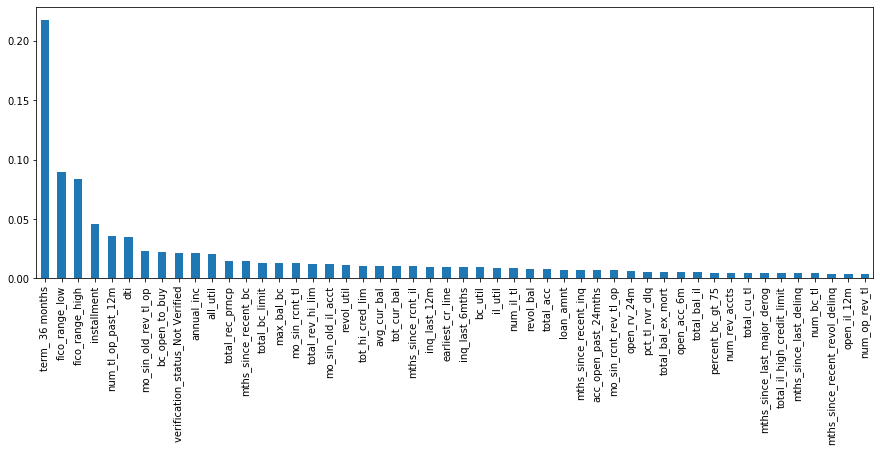

In [151]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp.head(50).plot(kind='bar', figsize=(15,5));

### Cross Validation and Model Selection

In [153]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [166]:
rf = RandomForestRegressor(n_estimators=100)
rf_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

In [167]:
lin = LinearRegression()
lin_scores = cross_val_score(lin, X[:,selected], y, cv=kf, scoring='r2')

In [170]:
svr = SVR(gamma='auto')
svr_scores = cross_val_score(svr, X[:,selected], y, cv=kf, scoring='r2')

In [169]:
tree = DecisionTreeRegressor()
tree_scores = cross_val_score(tree, X, y, cv=kf, scoring='r2')

In [174]:
res = pd.DataFrame({'rf': rf_scores, 'lin': lin_scores, 'svr': svr_scores, 'tree': tree_scores})
res

,rf,lin,svr,tree
0,0.561662,0.268993,0.268993,0.094044
1,0.512897,0.245583,0.245583,0.068486
2,0.528740,0.206737,0.206737,0.148602
3,0.595660,0.216862,0.216862,0.077290
4,0.553976,0.179007,0.179007,-0.127698


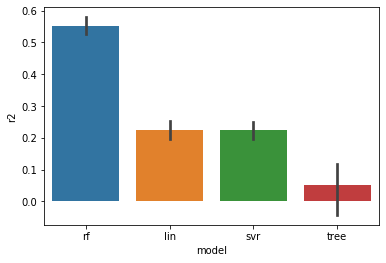

In [180]:
sns.barplot(x="model", y="r2", data=res.melt(var_name='model', value_name='r2'));